# K-Nearest Neighbors Classification with chebyshev_modified_distance



In [20]:
import numpy as np


In [21]:
a = np.random.rand(3,4)

In [22]:
a

array([[0.91481905, 0.44604869, 0.24475369, 0.85256109],
       [0.66731471, 0.68380377, 0.30320748, 0.74408104],
       [0.24483567, 0.86104165, 0.25600261, 0.3270389 ]])

In [ ]:
# res = 0
# for j in range(D):
#     res += (a[j] - b[j])**2
# sqrt(res)


def chebyshev_modified_distance(a, b):
    return np.median(np.abs(a - b),axis=1)

In [24]:
x = np.random.rand(1, 2)
y = np.random.rand(1, 2)
print(x)
print(y)
chebyshev_modified_distance(x, y)

[[0.5632776  0.98998393]]
[[0.13486169 0.24743745]]


array([0.5854812])

In [25]:
def score(X_test, y_test):
    y_pred = predict(X_test)

    return float(sum(y_pred == y_test))/ float(len(y_test))

In [ ]:
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='uniform'):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = 3

    def chebyshev_modified_distance(a, b):
        return np.median(np.abs(a - b),axis=1)

    def euclidian_distance(a, b):
        return np.sqrt(np.sum((a-b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

#         print(X_test, self.X_train. X_test, self.X_train)
        point_dist = []

        if return_distance:
            for x_test in X_test:
                point_dist += [ self.chebyshev_modified_distance(x_test, self.X_train) ]
        else:
            for x_test in X_test:
                point_dist += [ self.euclidian_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            #print("Y_pred: ", y_pred)
            return y_pred

        if self.weights == 'distance':

            dist, neigh_ind = self.kneighbors(X_test, return_distance=True)

            inv_dist = 1 / dist

            mean_inv_dist = inv_dist / np.sum(inv_dist, axis=1)[:, np.newaxis]
#             print(mean_inv_dist.shape)

            proba = []

            for i, row in enumerate(mean_inv_dist):

                row_pred = self.y_train[neigh_ind[i]]

                for k in range(self.n_classes):
                    indices = np.where(row_pred == k)
                    prob_ind = np.sum(row[indices])
                    proba.append(np.array(prob_ind))

            predict_proba = np.array(proba).reshape(X_test.shape[0],
                                                    self.n_classes)

            y_pred = np.array([np.argmax(item) for item in predict_proba])

            return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test


# Iris dataset (Observations/Treatments)

In [27]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from matplotlib import pyplot as plt
dataset = datasets.load_iris(as_frame=True)

X = dataset.data
y = dataset.target


In [28]:
X.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [29]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

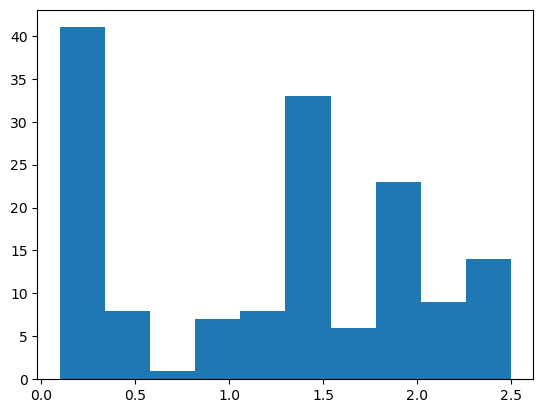

In [30]:
plt.hist(X['petal width (cm)'],10)
plt.show()

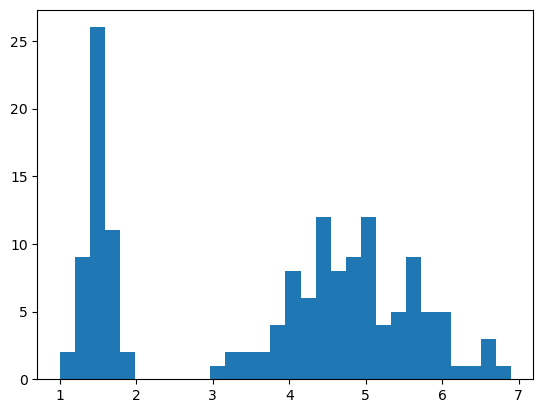

In [31]:

plt.hist(X['petal length (cm)'],30)
plt.show()

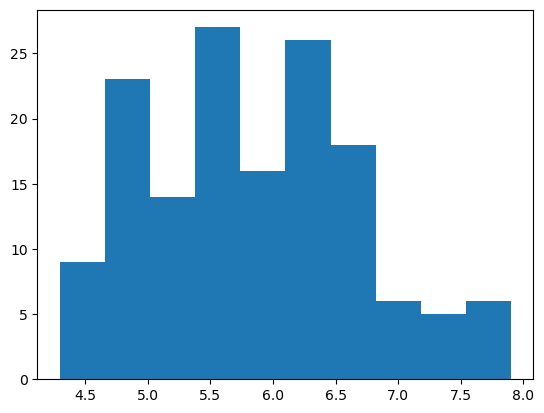

In [32]:

plt.hist(X['sepal length (cm)'],10)
plt.show()

In [33]:
mu = np.mean(X, 0)
sigma = np.std(X, 0)
X = (X - mu ) / sigma

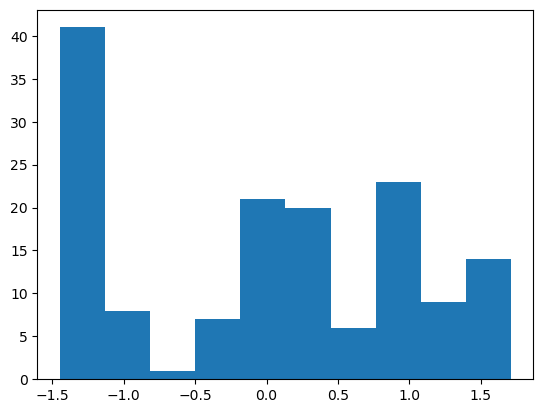

In [34]:
plt.hist(X['petal width (cm)'],10)
plt.show()

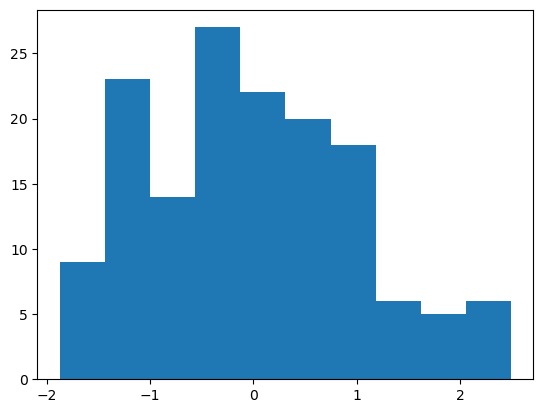

In [35]:
plt.hist(X['sepal length (cm)'],10)
plt.show()

In [36]:
dataset.target_names, dataset.feature_names


(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [37]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3,stratify=y, random_state=45)



our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=8)
sklearn_classifier = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)

our_accuracy, y_pred, y_test = our_classifier.score(X_test, y_test)
sklearn_accuracy = sklearn_classifier.score(X_test, y_test)

print(y_pred[:20], y_test[:20])

pd.DataFrame([[our_accuracy, sklearn_accuracy]],
             ['Accuracy'],
             ['Our Implementation', 'Sklearn\'s Implementation'])

[1 0 2 0 0 2 0 1 1 0 1 1 1 0 1 2 1 0 1 2] [1 0 2 0 0 2 0 2 1 0 1 1 1 0 2 2 1 0 1 2]


,Our Implementation,Sklearn's Implementation
Accuracy,0.911111,0.911111


k=2, accuracy=0.8889
k=3, accuracy=0.9111
k=4, accuracy=0.9333
k=5, accuracy=0.9333
k=6, accuracy=0.9333
k=7, accuracy=0.9333
k=8, accuracy=0.9333
k=9, accuracy=0.9333
k=10, accuracy=0.9333
k=11, accuracy=0.9333


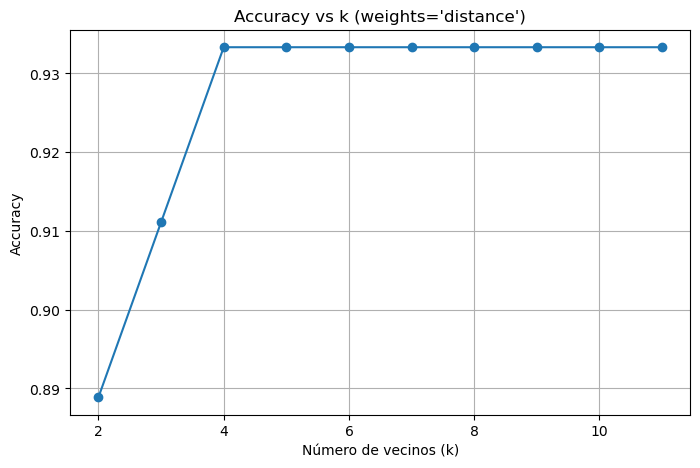

[0.8888888888888888,
 0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

In [38]:
def evaluate_k_range(k_values=range(2,12), weights="distance"):

    accuracies = []

    for k in k_values:

        model = KNearestNeighbors(X_train, y_train, n_neighbors=k, weights="distance")


        acc, _, _ = model.score(X_test, y_test)
        accuracies.append(acc)
        print(f"k={k}, accuracy={acc:.4f}")


    plt.figure(figsize=(8,5))
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel("Número de vecinos (k)")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs k (weights='{weights}')")
    plt.grid(True)
    plt.show()

    return accuracies
evaluate_k_range()